In [356]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.stats import zscore

### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [386]:
#read the file and store in dataframe
missing_values = ['?']
dfcars = pd.read_csv("carsdataset.csv",na_values = missing_values)
dfcars.shape

(398, 8)

In [387]:
dfcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [388]:
missing_values=dfcars.columns[dfcars.isnull().any()]
print(dfcars[missing_values].isnull().sum())
print(dfcars[dfcars.isnull().any(axis=1)][missing_values].head(10))

hp    6
dtype: int64
     hp
32  NaN
126 NaN
330 NaN
336 NaN
354 NaN
374 NaN


In [389]:
dfcars.dropna(subset= ['hp'], inplace = True)
dfcars.shape

(392, 8)

In [390]:
dfcars.describe(include='all').transpose()

count unique             top freq     mean      std   min      25%  \
car name   392    301  toyota corolla    5      NaN      NaN   NaN      NaN   
cyl        392    NaN             NaN  NaN  5.47194  1.70578     3        4   
disp       392    NaN             NaN  NaN  194.412  104.644    68      105   
hp         392    NaN             NaN  NaN  104.469  38.4912    46       75   
wt         392    NaN             NaN  NaN  2977.58  849.403  1613  2225.25   
acc        392    NaN             NaN  NaN  15.5413  2.75886     8   13.775   
yr         392    NaN             NaN  NaN  75.9796  3.68374    70       73   
mpg        392    NaN             NaN  NaN  23.4459  7.80501     9       17   

             50%      75%   max  
car name     NaN      NaN   NaN  
cyl            4        8     8  
disp         151   275.75   455  
hp          93.5      126   230  
wt        2803.5  3614.75  5140  
acc         15.5   17.025  24.8  
yr            76       79    82  
mpg        22.75       29  46.6

In [378]:
X = dfcars[['cyl','disp','hp','wt','acc','yr','mpg']]
from scipy.stats import zscore
dfcars = X.apply(zscore)
dfcars.head()

cyl      disp        hp        wt       acc        yr       mpg
0  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315 -0.698638
1  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315 -1.083498
2  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315 -0.698638
3  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315 -0.955212
4  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315 -0.826925

### Use pair plot or scatter matrix to visualize how the different variables are related 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


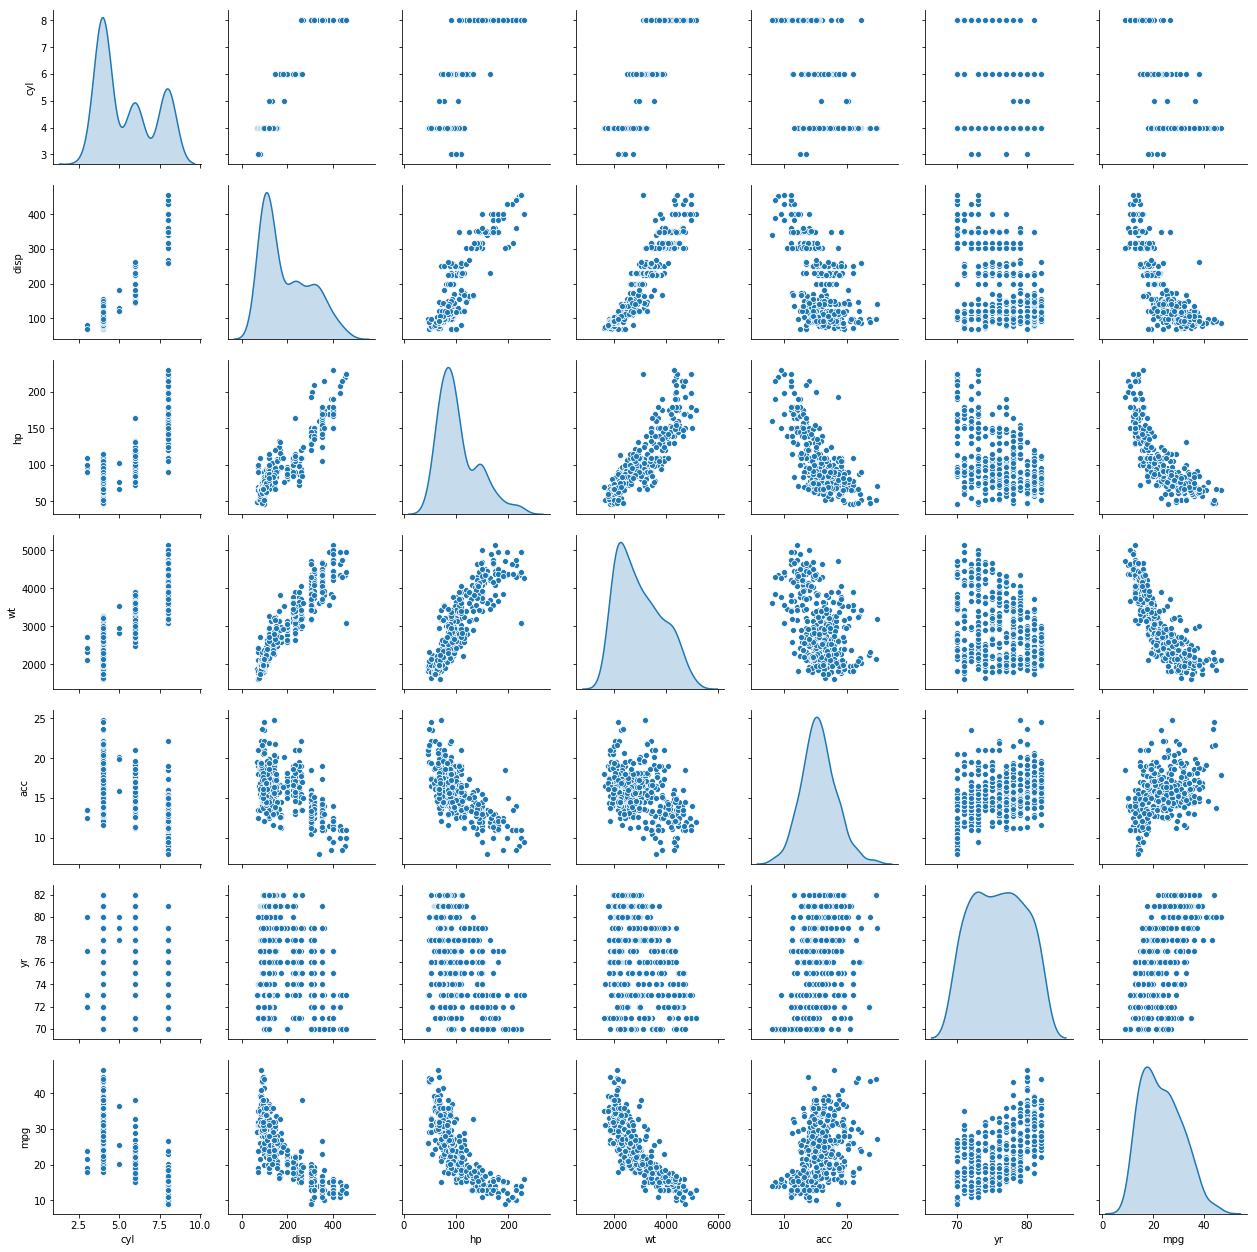

In [355]:
sns.pairplot(X, diag_kind="kde")

In [329]:
## Correlation Matrix
corr = X.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

#### As per the pairplots and correlation matrix, we can infer that there is a very good relationship between cyl&disp and disp&wt and some relationship between yr&mpg and mpg data showing linear patterns along these. The amount of Gaussian curves in the plot diagonal indicate visual identification of 3 different clusters

### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

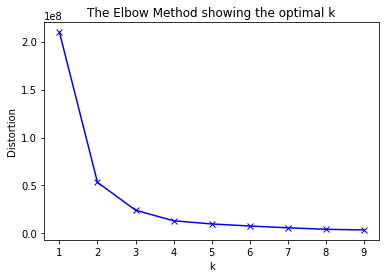

In [340]:
# Using the elbow method to find  the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

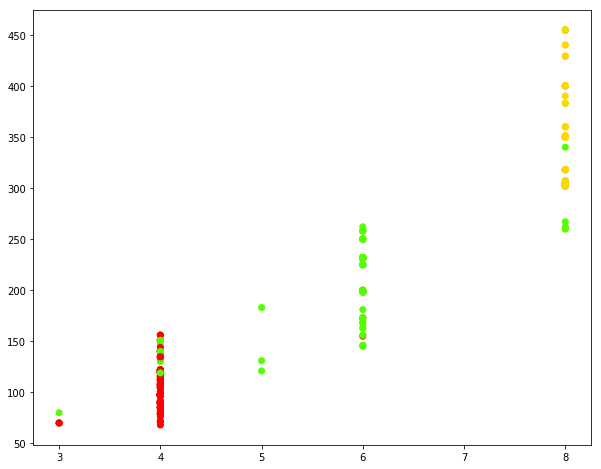

In [379]:
# Build kmeans clustering model using k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [155]:
kmeans.cluster_centers_

array([[ 0.33494504,  0.2383222 , -0.06008562,  0.31224583,  0.34368548,
        -0.02047725, -0.50088596],
       [-0.84955567, -0.80573341, -0.67381674, -0.79385439,  0.33970849,
         0.32154349,  0.77084364],
       [ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766]])

In [393]:
dfnew = {'cyl':X['cyl'],'disp':X['disp'],'hp':X['hp'],'wt':X['wt'], 'acc':X['acc'],'yr':X['yr'],'mpg':X['mpg'], 'xcluster':clusters, 'car_name':dfcars['car name']}
dfnew = pd.DataFrame(dfnew)
dfnew.head(5)

cyl   disp     hp    wt   acc  yr   mpg  xcluster  \
0    8  307.0  130.0  3504  12.0  70  18.0         2   
1    8  350.0  165.0  3693  11.5  70  15.0         1   
2    8  318.0  150.0  3436  11.0  70  18.0         2   
3    8  304.0  150.0  3433  12.0  70  16.0         2   
4    8  302.0  140.0  3449  10.5  70  17.0         2   

                    car_name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

### Use linear regression model on different clusters separately and print the coefficients of the models individually

In [401]:
clusters = {'xcluster':clusters}
dfclusters = pd.DataFrame(clusters)
print(dfclusters.count())
print(dfcars.count())
dfnew = pd.concat([dfnew,dfclusters],axis=1)

xcluster    1
dtype: int64
car name    392
cyl         392
disp        392
hp          392
wt          392
acc         392
yr          392
mpg         392
dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [397]:
# create 3 new dataframes based on 3 clusters
grouped = clus_mpg.groupby('xcluster')
l_grouped = list(grouped)

dfcluster1 = l_grouped[0][1]
dfcluster2 = l_grouped[1][1]
dfcluster3 = l_grouped[2][1]

dfcluster1.reset_index(drop=True,inplace=True)
dfcluster2.reset_index(drop=True,inplace=True)
dfcluster3.reset_index(drop=True,inplace=True)

In [162]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [398]:
#------------------------------------------------------------------------------
# Function defined to perform linear regression of each of the cluster dataframe and print the required stats.
#------------------------------------------------------------------------------

def LinRegres(df_in):
       
    # Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
    X = df_in.drop(["mpg","xcluster","car_name"], axis=1)

    # Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
    y = df_in[['mpg']]

    #Let us break the X and y dataframes into training set and test set. For this we will use
    #Sklearn package's data splitting function which is based on random function

    from sklearn.model_selection import train_test_split
    # Split X and y into training and test set in 70:30 ratio

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Let us explore the coefficients for each of the independent attributes

    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

        # Let us check the intercept for the model
    intercept = regression_model.intercept_[0]

    print("The intercept for our model is {}".format(intercept))

    print("Regression Model score of training data:",regression_model.score(X_train, y_train))

    print("Regression Model score of test data:",regression_model.score(X_test, y_test))
    
    return

In [399]:
print("\n The coeffients of Linear regression model of 1st cluster \n")
LinRegres(dfcluster1)

print("\n The coeffients of Linear regression model of 2nd cluster \n")
LinRegres(dfcluster2)

print("\n The coeffients of Linear regression model of 3rd cluster \n")
LinRegres(dfcluster3)


 The coeffients of Linear regression model of 1st cluster 

The coefficient for cyl is 0.21428191222912882
The coefficient for disp is -0.017638431620337222
The coefficient for hp is -0.02838792975756385
The coefficient for wt is -0.004883823729557143
The coefficient for acc is 0.24171529847691756
The intercept for our model is 37.86812619489592
Regression Model score of training data: 0.4314815875584328
Regression Model score of test data: 0.379742364523161

 The coeffients of Linear regression model of 2nd cluster 

The coefficient for cyl is -0.4217798630812733
The coefficient for disp is -0.03106066038001293
The coefficient for hp is -0.25696694848919965
The coefficient for wt is -0.0012820489798657034
The coefficient for acc is -0.682807113175961
The intercept for our model is 68.51202070667074
Regression Model score of training data: 0.39781626923205793
Regression Model score of test data: 0.19924661651020625

 The coeffients of Linear regression model of 3rd cluster 

The coeff